# Plot Variables

## Import Libraries

In [2]:
import pandas as pd
from p1_uml_util import *
import seaborn as sns

## Define Funcitons

In [3]:
def prepare_data():
    # script_path = os.path.dirname(os.path.abspath())
    #data_path = os.path.join(script_path, "data")
    #file_path = os.path.join(data_path, "data.csv")
    _df = read_csv_file('data/data.csv')
    _df['timestamp'] = pd.to_datetime(_df['timestamp'], format='%d.%m.%Y %H:%M')
    print(_df.dtypes)
    _df.set_index(lb_timestamp, inplace=True)
    print(_df.dtypes)
    return _df



In [4]:
def plot_data(_df: pd.DataFrame, lb1, lb2, legend):
    import matplotlib.pyplot as plt
    _df_to_plot = _df.copy()
    plt.plot(_df_to_plot.index, _df_to_plot[lb1], label=alias[lb_V005_vent01_CO2])
    plt.plot(_df_to_plot.index, _df_to_plot[lb2], label=alias[lb_V022_vent02_CO2])
    plt.xlabel(lb_timestamp)
    plt.ylabel(legend)
    plt.legend()
    plt.show()

Plot all the data frame regarding $CO_2$ concentration througout the day for all the days together.

## Get Data

In [21]:
df = prepare_data()


timestamp               datetime64[ns]
V005_vent01_CO2                float64
V022_vent02_CO2                float64
V006_vent01_temp_out           float64
V023_vent02_temp_out           float64
dtype: object
V005_vent01_CO2         float64
V022_vent02_CO2         float64
V006_vent01_temp_out    float64
V023_vent02_temp_out    float64
dtype: object


Stack days one above the other in the same range of ours

In [22]:
# Generate hours and days to separate columns
df['hour'] = df.index.hour
df['date'] = df.index.date
df.head(2)

,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,hour,date
timestamp,,,,,,
2012-06-23 01:00:00,494.172532,405.514287,22.7,23.449972,1,2012-06-23
2012-06-23 02:00:00,491.992574,404.705170,22.7,23.400000,2,2012-06-23


## Plot variables

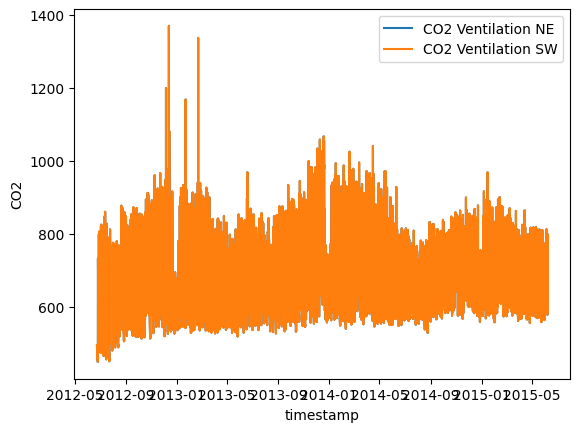

In [15]:

plot_data(df, lb_V005_vent01_CO2, lb_V005_vent01_CO2, 'CO2') 

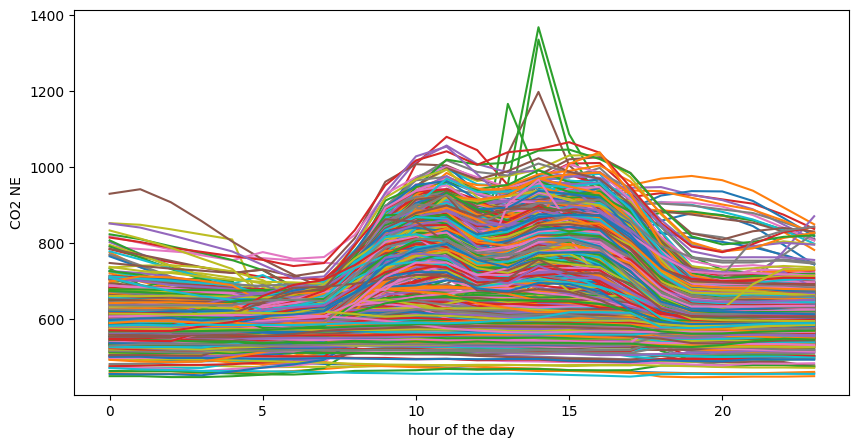

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('CO2 NE')
ax.set_xlabel('hour of the day')
for date, group in df.groupby('date'):
    ax.plot(group['hour'], group[lb_V005_vent01_CO2], label=date)

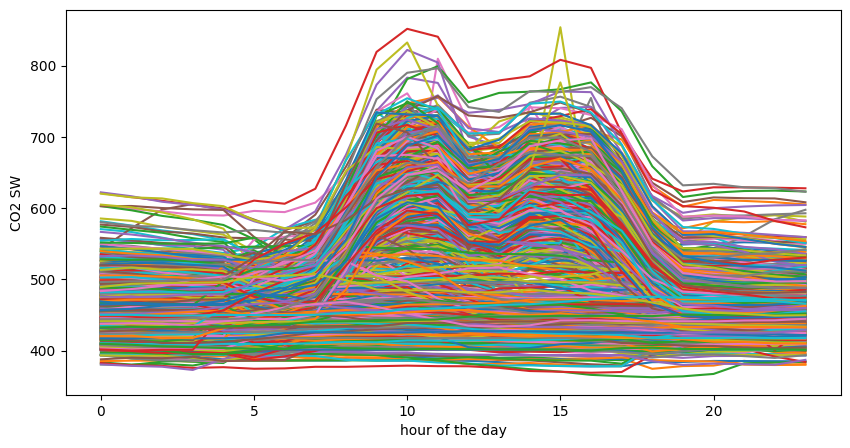

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('CO2 SW')
ax.set_xlabel('hour of the day')
for date, group in df.groupby('date'):
    ax.plot(group['hour'], group[lb_V022_vent02_CO2], label=date)

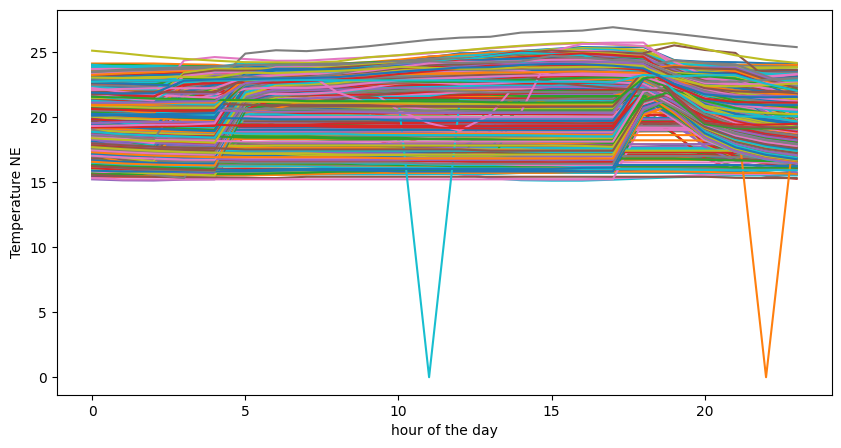

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('Temperature NE')
ax.set_xlabel('hour of the day')
for date, group in df.groupby('date'):
    ax.plot(group['hour'], group[lb_V006_vent01_temp_out], label=date)

Check distribution using box plots

Text(0.5, 0, 'hour of the day')

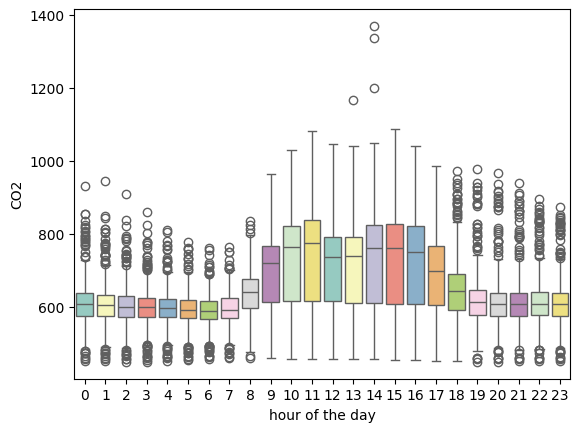

In [ ]:
import seaborn as sns
sns.boxplot(x='hour', y=lb_V005_vent01_CO2, data=df, palette='Set3', hue='hour', legend=False)
plt.ylabel('CO2')
plt.xlabel('hour of the day')

Plot the other variables

<Axes: xlabel='hour', ylabel='V022_vent02_CO2'>

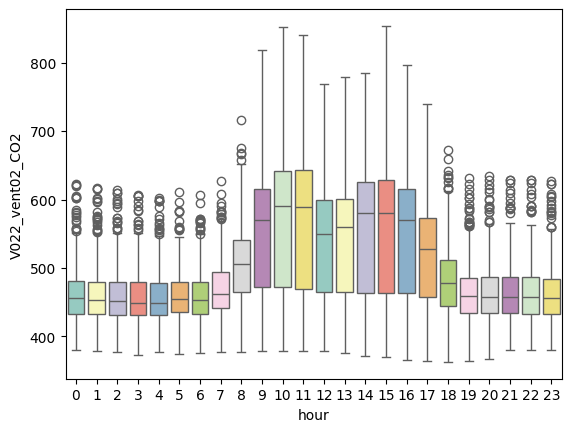

In [11]:
sns.boxplot(x = 'hour', y= lb_V022_vent02_CO2, data=df, palette='Set3', hue='hour', legend=False)

<Axes: xlabel='hour', ylabel='V006_vent01_temp_out'>

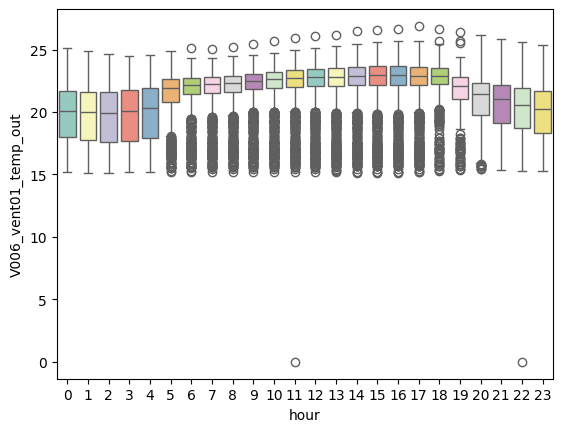

In [13]:
sns.boxplot(x = 'hour', y= lb_V006_vent01_temp_out, data=df, palette='Set3', hue='hour', legend=False)

<Axes: xlabel='hour', ylabel='V023_vent02_temp_out'>

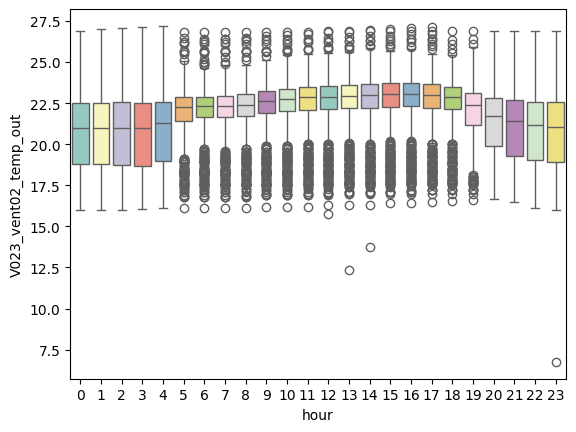

In [14]:
sns.boxplot(x = 'hour', y= lb_V023_vent02_temp_out, data=df, palette='Set3', hue='hour', legend=False)

# Identify Anomalies for univariate analysis

## Import Libraries

In [7]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np


## Setting up Isolation Forest

In [8]:
# Use only one variable to detect anomalies
x = df[[lb_V005_vent01_CO2]].values


In [9]:
x

array([[494.1725323],
       [491.9925737],
       [490.0034667],
       ...,
       [617.569761 ],
       [615.9496098],
       [613.7087647]], shape=(25942, 1))

In [10]:
isoForest = IsolationForest(
    n_estimators=100,         # More trees = more stable, default is good
    max_samples='auto',       # Automatically chooses min(256, n_samples), ideal for speed + accuracy
    contamination=0.05,       # Set based on expected % of anomalies, tune this
    max_features=1.0,         # Use all features (for univariate this is 1 anyway)
    bootstrap=False,          # Keep it False for most use-cases
    n_jobs=-1,                # Use all cores
    random_state=42,          # For reproducibility
    verbose=0  )
isoForest.fit(x)

IsolationForest(contamination=0.05, n_jobs=-1, random_state=42)

In [23]:
df_test = df.copy()

In [24]:
df_test['anomaly'] = isoForest.predict(x)

In [25]:
df_test

,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,hour,date,anomaly
timestamp,,,,,,,
2012-06-23 01:00:00,494.172532,405.514287,22.700000,23.449972,1,2012-06-23,-1
2012-06-23 02:00:00,491.992574,404.705170,22.700000,23.400000,2,2012-06-23,-1
2012-06-23 03:00:00,490.003467,401.981443,22.628444,23.400000,3,2012-06-23,-1
2012-06-23 04:00:00,490.972327,402.471192,22.600000,23.400000,4,2012-06-23,-1
2012-06-23 05:00:00,489.132106,403.174487,22.600000,23.349972,5,2012-06-23,-1
...,...,...,...,...,...,...,...
2015-06-08 19:00:00,624.063257,533.007180,22.557156,23.154668,19,2015-06-08,1
2015-06-08 20:00:00,621.028671,523.581086,21.732667,23.009318,20,2015-06-08,1
2015-06-08 21:00:00,617.569761,518.422520,21.530667,22.900015,21,2015-06-08,1


In [27]:
# drop detected anomalies
df_wth_anomaly_v1 = df_test[df_test['anomaly'] != -1]

In [14]:
import matplotlib.pyplot as plt


def plot_wthout_anomaly(df, variable, label):
    plt.figure(figsize=(14, 6))
    #plt.plot(df['hour'], df[variable], label=label)
    sns.boxplot(x='hour', y=variable, data=df, palette='Set3', hue='hour', legend=False)
    plt.xlabel('Time')
    plt.ylabel(label)
    plt.title('Anomaly Detection using Isolation Forest')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



C:\Users\danie\AppData\Local\Temp\ipykernel_23136\2988598705.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


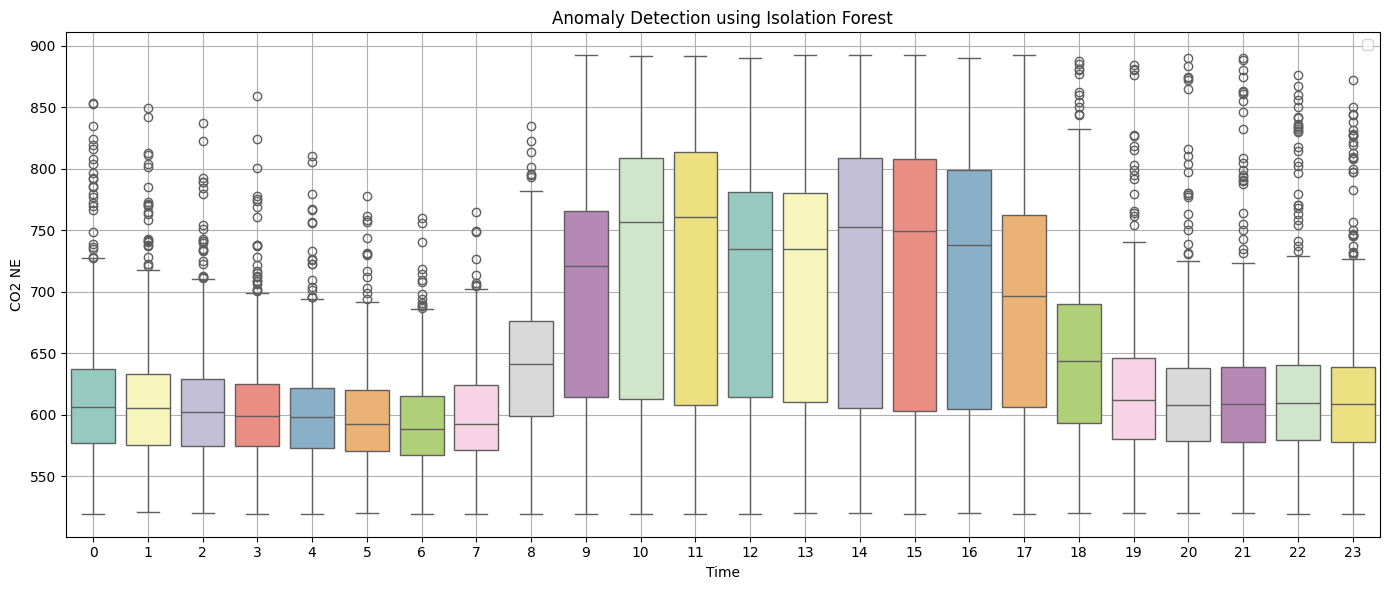

In [28]:
plot_wthout_anomaly(df_wth_anomaly_v1, lb_V005_vent01_CO2, 'CO2 NE')

In [37]:
def identify_anomalies(df, isolationForestModel, variable, label:str = ''):
    x = df[[variable]].values
    df['anomaly'] = isolationForestModel.fit_predict(x)
    anomalies = df[df['anomaly'] == -1]
    whtout_anomaly = df[df['anomaly'] != -1]
    plot_wthout_anomaly(whtout_anomaly, variable, label)
    return anomalies, whtout_anomaly

C:\Users\danie\AppData\Local\Temp\ipykernel_23136\2988598705.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


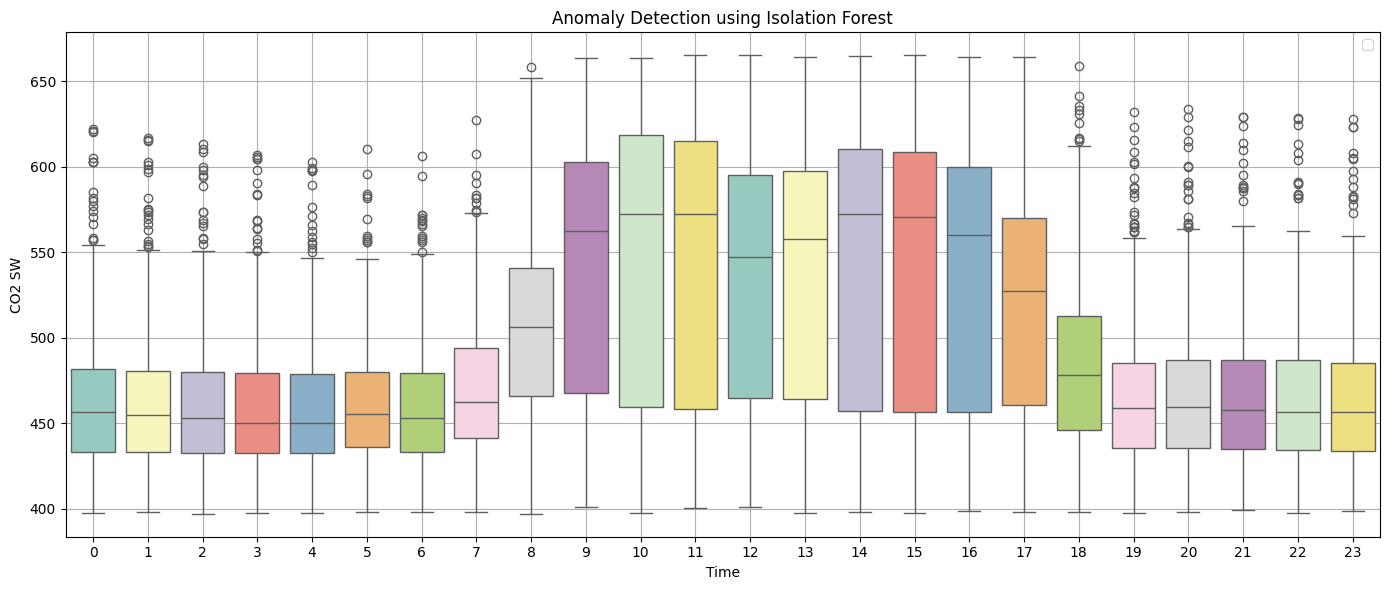

In [38]:
_, _ = identify_anomalies(df, isoForest, lb_V022_vent02_CO2, 'CO2 SW')

C:\Users\danie\AppData\Local\Temp\ipykernel_23136\2988598705.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


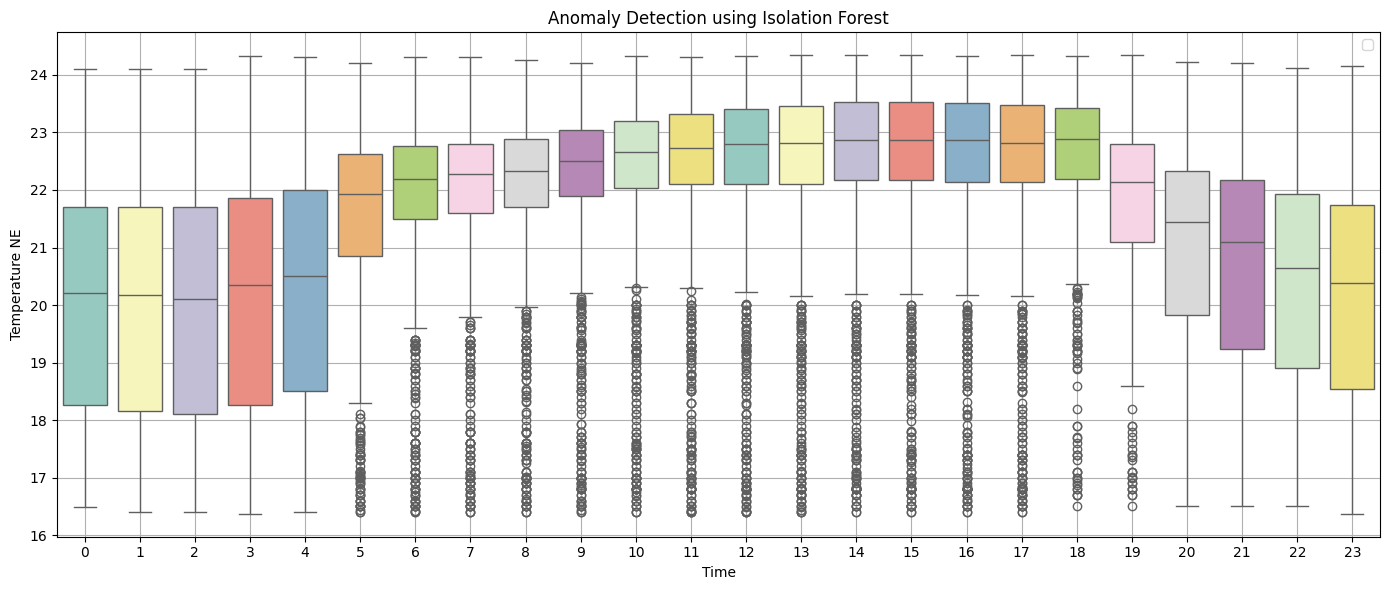

In [40]:
_, _ = identify_anomalies(df, isoForest, lb_V006_vent01_temp_out, 'Temperature NE')

C:\Users\danie\AppData\Local\Temp\ipykernel_23136\2988598705.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


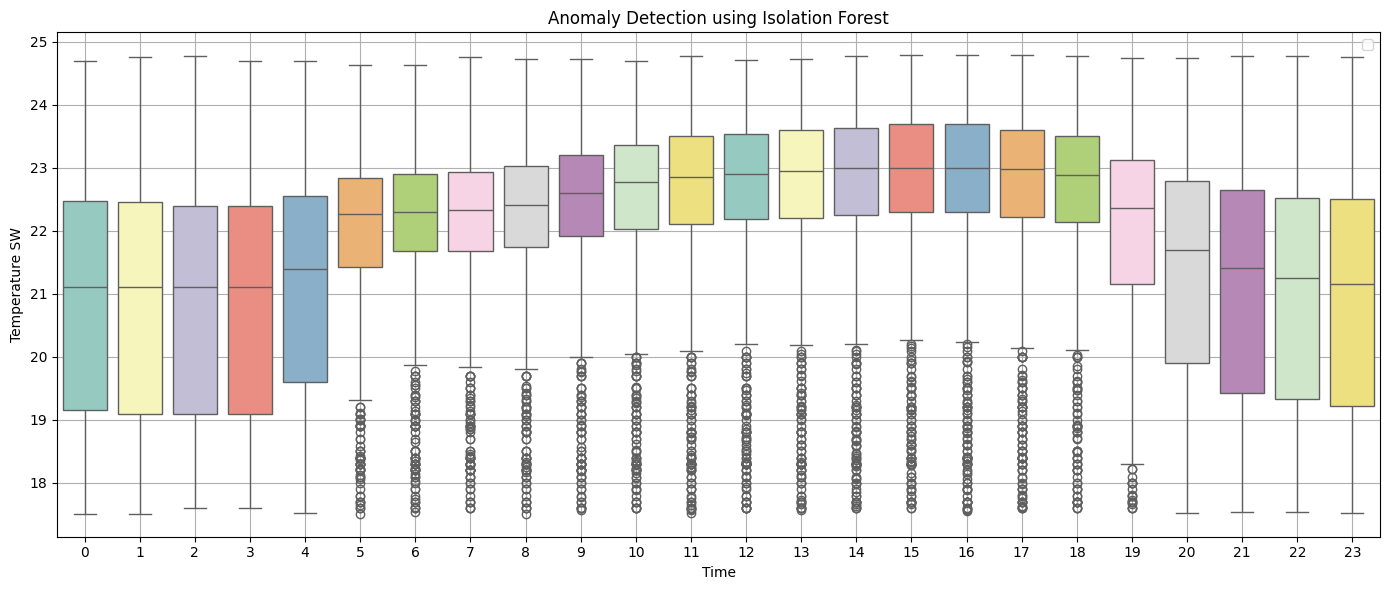

In [41]:
_, _ = identify_anomalies(df, isoForest, lb_V023_vent02_temp_out, 'Temperature SW')